page 215 / ПОЛУЧЕНИЕ ИСТОРИЧЕСКИХ
ДАННЫЕ

После установки nsepy трейдер может получить исторические данные о запасах контрактов, торгуемых на NSE
(Индия), с помощью следующих команд. Я взял пример SBI, трейдер может использовать любой символ от даты
начала до даты окончания по вашему выбору. Последняя команда print (sbi.tail()) используется для печати последних
5 строк таблицы. 'print (sbi.head())' также можно использовать для печати первых 5 строк таблицы. Трейдер требует
написания команд в заранее определенном формате, и только он получит ответ от листа Jupyter.

In [1]:
#pip install nse-data-reader
#pip install tables 
#pip install sqlalchemy 
#pip install matplotlib
from datetime import datetime
from nsepy import get_history

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [2]:
sbi = get_history (symbol='SBIN', start=datetime(2018,1,1), end=datetime(2018,12,31))
print (sbi.tail())

           Symbol Series  Prev Close    Open    High     Low    Last   Close  \
Date                                                                           
2018-12-24   SBIN     EQ      291.90  293.50  295.00  290.15  293.50  293.05   
2018-12-26   SBIN     EQ      293.05  292.85  295.00  287.15  294.55  294.15   
2018-12-27   SBIN     EQ      294.15  296.70  297.60  291.50  293.30  292.15   
2018-12-28   SBIN     EQ      292.15  293.60  297.10  293.55  294.45  294.80   
2018-12-31   SBIN     EQ      294.80  297.20  298.25  295.50  295.65  295.90   

              VWAP    Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                     
2018-12-24  292.60  12048877  3.525492e+14   91297             2344946   
2018-12-26  290.87  12684324  3.689454e+14   80935             1715170   
2018-12-27  294.03  15304564  4.500070e+14   92770             4835730   
2018-12-28  295.43  12876558  3.804110e+14   85894             389689

Приведенные выше данные также могут быть нанесены на график. Для построения графика первому трейдеру необходимо импортировать
встроенный модуль Matplotib. Используя Matplotlib, вы можете строить графики, гистограммы, гистограммы и т. Д. После выполнения
вышеуказанных команд следующие команды можно использовать для построения диаграмм данных:

<AxesSubplot: xlabel='Date'>

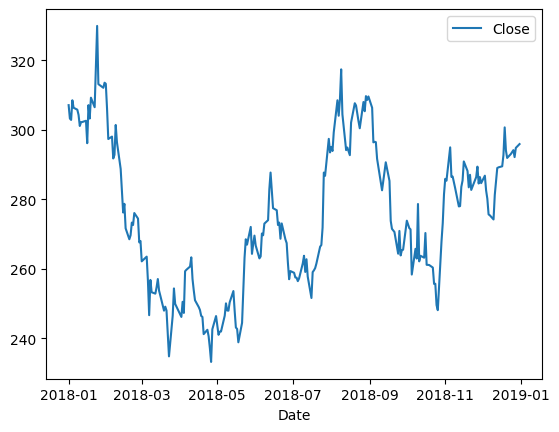

In [3]:
import matplotlib.pyplot
sbi[['Close']].plot()

page 217 / Future

Вы также можете получить будущие цены. Необходимо указать тип инструмента и срок действия контракта.
Следующие команды могут получить будущие цены за данный период

In [5]:
from datetime import date
from nsepy import get_history
stock_fut = get_history(symbol="SBIN",
                        start=date(2015,1,1),
                        end=date(2015,1,10),
                        futures=True,
                        expiry_date=date(2015,1,29))

In [6]:
print(stock_fut.tail())

           Symbol      Expiry    Open    High     Low   Close    Last  \
Date                                                                    
2015-01-05   SBIN  2015-01-29  318.00  318.75  314.10  315.00  315.05   
2015-01-06   SBIN  2015-01-29  312.95  312.95  300.10  301.30  301.10   
2015-01-07   SBIN  2015-01-29  301.95  304.55  297.35  302.25  303.50   
2015-01-08   SBIN  2015-01-29  306.50  308.40  303.70  306.65  307.00   
2015-01-09   SBIN  2015-01-29  306.75  309.25  301.05  304.75  304.15   

            Settle Price  Number of Contracts      Turnover  Open Interest  \
Date                                                                         
2015-01-05        315.00                17455  6.898723e+09       55718750   
2015-01-06        301.30                29338  1.126715e+10       56701250   
2015-01-07        302.25                28489  1.074823e+10       58036250   
2015-01-08        306.65                20120  7.702653e+09       57287500   
2015-01-09        30

Вы также можете получить цены опционов. Помимо типа инструмента, даты истечения контракта необходимо
указать option_type как «CE» для call и как «PE» для опциона put и strike_price - цену исполнения контракта.
Следующие команды могут получить цены опционов за данный период для данного страйка:

In [8]:
from datetime import date
from nsepy import get_history
stock_opt = get_history(symbol="SBIN",
                        start=date(2015,1,1),
                        end=date(2015,1,10),
                        option_type="CE",
                        strike_price=300,                    
                        expiry_date=date(2015,1,29))

In [9]:
print(stock_opt.head())

           Symbol      Expiry Option Type  Strike Price   Open   High    Low  \
Date                                                                           
2015-01-01   SBIN  2015-01-29          CE         300.0  18.95  21.15  18.95   
2015-01-02   SBIN  2015-01-29          CE         300.0  21.50  23.90  21.35   
2015-01-05   SBIN  2015-01-29          CE         300.0  21.00  21.00  18.60   
2015-01-06   SBIN  2015-01-29          CE         300.0  16.10  16.80  10.50   
2015-01-07   SBIN  2015-01-29          CE         300.0  11.05  12.50   9.00   

            Close   Last  Settle Price  Number of Contracts     Turnover  \
Date                                                                       
2015-01-01  20.85  20.95         20.85                   44   17631000.0   
2015-01-02  21.45  21.40         21.45                   84   33889000.0   
2015-01-05  18.60  18.60         18.60                   47   18775000.0   
2015-01-06  11.05  11.20         11.05                  328

Получить базовые данные об акциях очень просто, вы просто указываете код скрипта и период, и вы получите данные. Но в случае Future каждый месяц
срок действия разный, поэтому вам нужно указать отдельную дату истечения срока действия. Таким образом, вы можете получить будущие данные с
одним истечением срока действия за один раз. В случае опции вы можете данные одного удара за раз. Эти отдельные данные не помогут, потому что для
обратного тестирования вам нужны данные в одной таблице.